# Métricas de avaliação de modelo


| **Métrica**  | **Tipo de Problema** | **Interpretação** | **Quando Usar** |
|-------------|----------------|----------------|----------------|
| **AUC-ROC** | Classificação | Quanto maior, melhor (0.5 a 1). | Comparar modelos binários, avaliar capacidade de discriminação. |
| **KS** | Classificação | Diferença entre distribuições (0 a 1). | Validar modelos de crédito/risco, selecionar melhores cortes. |
| **Gini** | Classificação | 2 × AUC - 1 (0 a 1). | Alternativa à AUC em finanças/seguros. |
| **Precision** | Classificação | % de positivos corretos. | Evitar falsos positivos (ex.: spam médico). |
| **Recall** | Classificação | % de positivos detectados. | Evitar falsos negativos (ex.: fraude, câncer). |
| **F1-Score** | Classificação | Balanceia Precision e Recall. | Dados desbalanceados ou custo alto de FP/FN. |
| **RMSE** | Regressão | Erro médio quadrático (quanto menor, melhor). | Quando grandes erros são críticos (ex.: previsão de preços). |
| **MAE** | Regressão | Erro médio absoluto (menos sensível a outliers). | Quando erros têm peso linear (ex.: demanda). |
| **R²** | Regressão | % da variância explicada (-∞ a 1). | Entender poder explicativo do modelo. |

| **Métrica** | **O que é?**                                                                 | **Como calcular?**                                                                 | **Quando usar?**                                                                 | **Interpretação**                                                                 |
|-------------|------------------------------------------------------------------------------|-----------------------------------------------------------------------------------|---------------------------------------------------------------------------------|---------------------------------------------------------------------------------|
| **KS**      | Mede a discriminação entre classes (binária).                                | $KS = \max \left( \| \text{CDF}_{\text{Positivo}}(x) - \text{CDF}_{\text{Negativo}}(x) \| \right)$ | Modelos de crédito, risco ou marketing.                                         | $0 \leq KS \leq 1$. **>0.3** (aceitável), **>0.5** (bom), **>0.7** (excelente).               |
| **Gini**    | Mede a desigualdade nas previsões (relacionado à AUC).                      | $\text{Gini} = 2 \times \text{AUC} - 1$                                         | Modelos de risco, seguros ou competições de ML.                                 | $0 \leq \text{Gini} \leq 1$. **0** (aleatório), **1** (perfeito). **>0.4** (bom).                      |
| **AUC**     | Área sob a curva ROC (discriminação binária).                                | Área entre $TPR = \frac{TP}{TP + FN}$ e $FPR = \frac{FP}{FP + TN}$.          | Classes desbalanceadas ou threshold desconhecido.                               | $0.5 \leq \text{AUC} \leq 1$. **0.5** (aleatório), **>0.7** (útil), **>0.9** (excelente).            |
| **RMSE**    | Raiz do erro quadrático médio (penaliza erros grandes).                     | $\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$          | Quando erros grandes são críticos (ex.: previsão de preços).                    | Quanto menor, melhor. Comparar com escala dos dados.                            |
| **MAE**     | Erro absoluto médio (menos sensível a outliers).                            | $\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \| y_i - \hat{y}_i \|$               | Quando outliers não devem ser penalizados excessivamente.                       | Quanto menor, melhor. Mesma unidade dos dados.                                 |
| **F1**      | Média harmônica entre Precision e Recall.                                   | $\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$ | Classes desbalanceadas (ex.: detecção de fraudes).                              | $0 \leq \text{F1} \leq 1$. **1** (perfeito), **0** (pior). **>0.7** (aceitável).                     |
| **Recall**  | Fração de positivos reais detectados (Sensibilidade).                       | $\text{Recall} = \frac{TP}{TP + FN}$                                           | Quando falsos negativos são graves (ex.: diagnóstico médico).                   | **Alto** = captura mais eventos, mas pode ter falsos positivos.                |
| **Precision** | Fração de positivos previstos corretos.                                   | $\text{Precision} = \frac{TP}{TP + FP}$                                        | Quando falsos positivos são críticos (ex.: spam detection).                      | **Alto** = menos falsos positivos, mas pode perder eventos reais.              |
| **R²**      | Proporção da variância explicada pelo modelo (regressão).                   | $R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}$           | Comparação de modelos de regressão linear.                                      | $-\infty \leq R^2 \leq 1$. **1** (perfeito), **0** (inútil), **<0** (pior que a média simples).           |

## AUC-ROC

Mede a capacidade do modelo de distinguir entre classes.

c:\Users\Lucas\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


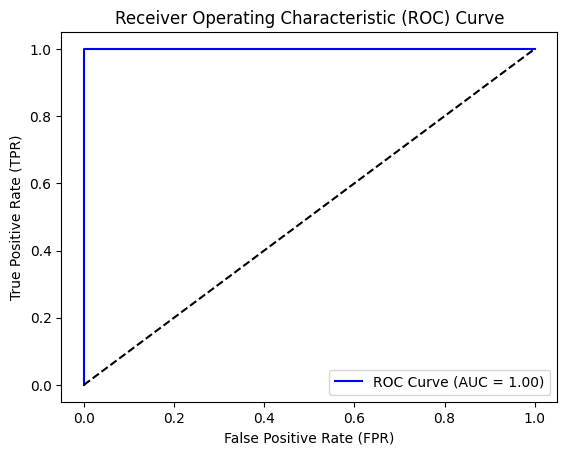

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Dados de exemplo
y_true = [1, 0, 1, 0]
y_pred_proba = [0.9, 0.4, 0.6, 0.3]

# Calcular FPR, TPR e thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência (aleatório)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## KS

O KS mede a distância máxima entre as distribuições cumulativas das classes positiva e negativa. É comum em modelos de crédito.


In [1]:
import numpy as np
from scipy.stats import ks_2samp

# Exemplo: Probabilidades previstas (score do modelo) e labels reais
y_true = np.array([0, 0, 1, 1, 1, 0, 1, 0])
y_scores = np.array([0.1, 0.4, 0.35, 0.8, 0.65, 0.2, 0.9, 0.3])

# Separa os scores para classes 0 e 1
score_classe0 = y_scores[y_true == 0]
score_classe1 = y_scores[y_true == 1]

# Calcula a estatística KS
ks_statistic, _ = ks_2samp(score_classe1, score_classe0)
print(f"KS Statistic: {ks_statistic:.4f}")

c:\Users\Lucas\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


KS Statistic: 0.7500


## Gini

O coeficiente de Gini é derivado da AUC e mede a desigualdade entre as classes.

In [2]:
from sklearn.metrics import roc_auc_score

# Calcula AUC primeiro
auc = roc_auc_score(y_true, y_scores)
gini = 2 * auc - 1
print(f"Coeficiente de Gini: {gini:.4f}")

Coeficiente de Gini: 0.8750


## RMSE

Usado em problemas de regressão para medir erros de previsão.

In [3]:
from sklearn.metrics import mean_squared_error

y_true_reg = np.array([3, -0.5, 2, 7])
y_pred_reg = np.array([2.5, 0.0, 2, 8])

rmse = np.sqrt(mean_squared_error(y_true_reg, y_pred_reg))
print(f"RMSE: {rmse:.4f}")

RMSE: 0.6124


## MAE

Outra métrica para regressão, menos sensível a outliers que o RMSE.

In [4]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true_reg, y_pred_reg)
print(f"MAE: {mae:.4f}")

MAE: 0.5000


## F1-Score

Média harmônica entre Precision e Recall (para problemas de classificação).

In [5]:
from sklearn.metrics import f1_score

# Labels binários e previsões
y_true_clf = np.array([0, 1, 1, 0, 1])
y_pred_clf = np.array([0, 1, 0, 0, 1])

f1 = f1_score(y_true_clf, y_pred_clf)
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.8000


# Recall

"Dos positivos reais, quantos foram identificados?"

É útil para quando falsos negativos são críticos (tipo diagnóstico médico)

In [1]:
from sklearn.metrics import recall_score

y_true = [1, 0, 1, 1, 0, 1]
y_pred = [1, 0, 0, 1, 0, 1]

recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2f}")  # 0.75 (3/4 positivos identificados)

c:\Users\Lucas\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Recall: 0.75


# Precision

"Dos identificados como positivos, quantos eram realmente positivos?"

É útil para quando falsos positivos são problemáticos (detecção de spam)

In [2]:
from sklearn.metrics import precision_score

y_true = [1, 0, 1, 1, 0, 1]
y_pred = [1, 0, 0, 1, 0, 1]

precision = precision_score(y_true, y_pred)
print(f"Precision: {precision:.2f}")  # 1.0 (todos os preditos como 1 eram 1)

Precision: 1.00


# R2
"Quanta variação da variável dependente é explicada pelo modelo?"

In [3]:
from sklearn.metrics import r2_score
import numpy as np

# Dados de exemplo para regressão
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

r2 = r2_score(y_true, y_pred)
print(f"R² Score: {r2:.2f}")  # 0.95 (95% da variação é explicada)

R² Score: 0.95
